# 1) Load and Filter Data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib
matplotlib.style.use('ggplot')

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
train_imgs = mnist.train.images
train_labels = mnist.train.labels
test_imgs = mnist.test.images
test_labels = mnist.test.labels

In [ ]:
mnist.train.next_batch(100)[1][0]

## Parse out the twos and the nines
Do this by looking for the indices where the label array is either 2 or 9

In [ ]:
train_indices = np.where(np.logical_or(np.where(train_labels[:] == 1)[1] == 2, 
                                       np.where(train_labels[:] == 1)[1] == 9))
test_indices = np.where(np.logical_or(np.where(test_labels[:] == 1)[1] == 2, 
                                      np.where(test_labels[:] == 1)[1] == 9))

In [ ]:
my_train_imgs = train_imgs[train_indices]
my_train_labels = train_labels[train_indices]

In [ ]:
train_imgs.shape

In [ ]:
X_test = test_imgs[test_indices]
y_test_old_encode = test_labels[test_indices]

In [ ]:
def fix_encoding(y_old_encode, labels):
    '''
    Changes old one-hot encoding from 10-class system to n-class system
    e.g. [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] -> [1, 0]
    and  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] -> [0, 1]
    converts 2 and 9 encoded vectors from base 10 to base 2
    y_old_encode: m x 10 np.array of m data encoded in base 10
    labels: python list of labels in desired classifier'''
    num_classes = len(labels)
    y = np.zeros((y_old_encode.shape[0], num_classes))
    pos_indicator = np.where(y_old_encode[:] == 1)[1]
    # t_indices = np.where(reduce(np.logical_or, [x== pos_indicator for x in lst]))
    for i, x in enumerate(labels):
        new_enc = np.zeros(num_classes)
        new_enc[i] = 1
        y[pos_indicator == x] = new_enc
        #y[t_indices] = new_enc
    return y

In [ ]:
y_test = fix_encoding(y_test_old_encode, [2, 9])

# 2) Look at the Data by Plotting actual images

In [9]:
def remove_grid_lines(axs):
    """Remove the default grid lines from a collection of axies."""
    for ax in axs.flatten():
        ax.grid(False)
        
def plot_greyscale_image(ax, image, label):
    """Plot a greyscale image and label its class."""
    first_digit = image.reshape(28, -1)
    ax.imshow(first_digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: {}".format(label))

In [ ]:
print 'X shape: {}'.format(my_train_imgs.shape)
print 'y shape: {}'.format(digit_labels.shape)

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(12, 6))

digit_labels = np.argmax(my_train_labels, axis=1)



for image, label, ax in zip(my_train_imgs, digit_labels, axs.flatten()):
    plot_greyscale_image(ax, image, label)
    # print (type(ax))
remove_grid_lines(axs)

Each image of a digit is represented as a 2-tensor, and is 28 pixels wide and 28 pixels high.

We will often refer to pixel intensities in an image as **activations** in the following way.  Pixels that are "on", or black, are said to be **activated**.  In this way, each digit should be characterized by a characteristic pattern of activations.

In [ ]:
digit_labels.shape

In [ ]:
digits_training = my_train_imgs.reshape(-1, 28, 28)
first_digit_image = digits_training[0]
print("Shape of digit image: {}".format(first_digit_image.shape))

The entire training data is a stack of 28 by 28 images, which is a 3-tensor

In [ ]:
print("Shape of training data: {}".format(digits_training.shape))

# 3) Create the Model

In [ ]:
num_pixels = train_imgs.shape[1]
num_classes = np.unique(my_train_labels).shape[0] # num_classes = len(labels) # labels is 
                                                                              # user-defined list e.g.[2, 9]
print ('Number of features: {}\n Number of classes: {}'.format(num_pixels, num_classes))

In [ ]:
x_tf = tf.placeholder(tf.float32, [None, num_pixels])
y_tf = tf.placeholder(tf.float32, [None, num_classes])
W = tf.Variable(tf.zeros([num_pixels, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))
y_hat = tf.matmul(x_tf, W) + b

# 4) Define Loss and Optimizer 

The raw formulation of cross-entropy, 

    tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(tf.nn.softmax(y_hat), reduction_indices=[1])))

can be numerically unstable.

So here we use tf.nn.softmax_cross_entropy_with_logits on the ray outputs of 'y_hat', and then average them across the batch

In [ ]:
cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels= y_tf, logits= y_hat))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# 5) Train

In [ ]:
x_tf.shape

In [ ]:
y_tf.shape

In [ ]:
y_hat.shape

In [ ]:
two_bool = np.array([1, 0])
nine_bool = np.array([0, 1])

In [ ]:
my_train_labels

In [ ]:
old_arr = my_train_labels[:23]

In [ ]:
np.where(old_arr[:] == 1)[1]

In [ ]:
new_arr = np.zeros((old_arr.shape[0], 2))

In [ ]:
new_arr[np.where(old_arr[:] == 1)[1] == 2] = np.array([1, 0])
new_arr[np.where(old_arr[:] == 1)[1] == 9] = np.array([0, 1])
new_arr

In [ ]:
old_indices

In [ ]:
for _ in range(1000):
    batch_imgs, batch_labels = mnist.train.next_batch(100)
    pos_indicator = np.where(batch_labels[:] == 1)[1]
    train_indices = np.where(np.logical_or(pos_indicator == 2, 
                                           pos_indicator == 9))
    xs = batch_imgs[train_indices]
    ys_old_hot_encode = batch_labels[train_indices]
    ys = fix_encoding(ys_old_hot_encode, [2, 9])
    # print xs.shape
    # print ys.shape
    # print y_tf.shape
    # break
    # pos_indicator = np.where(ys_old_hot_encode[:] == 1)[1]
    # ys = np.zeros((ys_old_hot_encode.shape[0], num_classes))
    # ys[pos_indicator == 2] = [1, 0]
    # ys[pos_indicator == 9] = [0, 1]
    sess.run(train_step, feed_dict={x_tf: xs.reshape(-1, num_pixels), y_tf: ys.reshape(-1, num_classes)})
    

# 6) Evaluate Model

In [ ]:
pred_probs = y_hat.eval(feed_dict= {x_tf: X_test.reshape(-1, num_pixels), y_tf: y_test.reshape(-1, num_classes)})

In [ ]:
pred_probs[:5, :] #  THESE ARE SUPPOSED TO BE PROBABILITIES!!!!!! WHAT HAPPENED?!?

In [ ]:
correct_preds = tf.equal(tf.argmax(y_tf, 1), tf.argmax(y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
print (sess.run(accuracy, feed_dict= {x_tf: X_test, y_tf: y_test}))

In [ ]:
fig, axes = plt.subplots(4, 4, figsize= (12, 6))

In [ ]:
p.plot_images(axes)

In [ ]:
p._plot_greyscale_image(img0, label0, ax0)

In [ ]:
ax0.imshow(img0.reshape(28, -1), cmap= plt.cm.gray_r, interpolation="nearest")

In [ ]:
for img, lab, ax in zip(p.my_images, p.my_labels, p.axes.flatten()):
    plot_greyscale_image(ax, img, lab)

In [ ]:
def remove_grid_lines(axes):
    """Remove the default grid lines from a collection of axies."""
    for ax in axes.flatten():
        ax.grid(False)

In [ ]:
def plot_greyscale_image(image, label, ax):
    """Plot a greyscale image and label its class."""
    first_digit = image.reshape(28, -1)
    ax.imshow(first_digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: {}".format(label))

def plot_images(axes):
    for image, label, ax in zip(X_train, y_train,
                                axes.flatten()):
        plot_greyscale_image(image, label, ax)

    remove_grid_lines(axes)

In [ ]:
plot_images(axes)

# Verify we are pulling out same train test data

In [1]:
from src.classifyMNIST import *

In [4]:
RD = Reduce_DataSet(mnist, [2, 9])

In [5]:
train_i = RD.get_indices()
test_i = RD.get_indices(False)

In [6]:
X_train, y_train_old = RD.reduce_train_test_set()
X_test, y_test_old = RD.reduce_train_test_set(False)

In [7]:
np.array_equal(y_train_old, my_train_labels)

NameError: name 'my_train_labels' is not defined

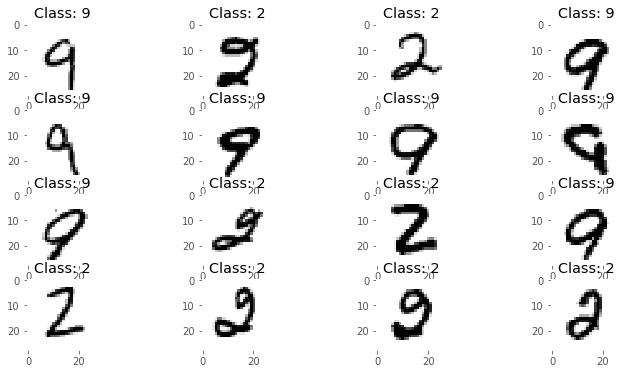

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(12, 6))

digit_labels = np.argmax(y_train_old, axis=1)



for image, label, ax in zip(X_train, digit_labels, axs.flatten()):
    plot_greyscale_image(ax, image, label)
    # print (type(ax))
remove_grid_lines(axs)